In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List of players in the squad along with their roles
players_and_roles = {
    "Rohit Sharma": "batter",
    "Hardik Pandya": "allrounder",
    "Shubman Gill": "batter",
    "Virat Kohli": "batter",
    "Shreyas Iyer": "batter",
    "Ishan Kishan": "batter",
    "KL Rahul": "batter, wicketkeeper",
    "Suryakumar Yadav": "batter",
    "Ravindra Jadeja": "allrounder",
    "Axar Patel": "allrounder",
    "Shardul Thakur": "pace bowler",
    "Jasprit Bumrah": "pace bowler",
    "Mohammed Shami": "pace bowler",
    "Mohammed Siraj": "pace bowler",
    "Kuldeep Yadav": "spin bowler"
}

# List of opponents
opponents = ["South Africa", "Australia", "New Zealand", "Pakistan", "Afghanistan", "England", "Bangladesh", "Sri Lanka", "Netherlands"]



EARLIEST_YEAR = 2017

In [3]:
# Function to read player data from JSON files
def read_player_data(player_name):
    file_path = f"../data/players/{player_name}.json"
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [4]:
# Function to extract relevant batting statistics

def batting_record_parser(record, id_extractor):
    return {
        "id": id_extractor(record['tt']),
        "matches": record["mt"],
        "runs": record["rn"],
        "fours": record["fo"],
        "sixes": record["si"],
        "fifties": record["ft"],
        "hundreds": record["hn"],
        "batting_average": record["bta"],
        "batting_strike_rate": record["btsr"],
        "batting_strike_rate": record["btsr"],
        "not_out_percentage": (int(record["no"])/int(record["mt"]))*100
    }


def extract_batting_statistics(data):
    batting_stats = data.get('BATTING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", batting_stats))[0]['stats']
    opposition_stats = [batting_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
    opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))

    # by year
    yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", batting_stats))[0]['stats']
    yearwise_stats = [batting_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
    yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))

    # by position
    position_stats = list(filter(lambda grp: grp.get('type') == "BATTING_POSITION", batting_stats))[0]['stats']
    position_stats = [batting_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]


    return opposition_stats, yearwise_stats, position_stats

In [ ]:
# Function to extract relevant batting statistics

def bowling_record_parser(record, id_extractor):
    return {
        "id": id_extractor(record['tt']),
        "matches": record["mt"],
        "overs": record["ov"],
        "wickets": record["wk"],
        "maiden": record["md"],
        "bowling_strike_rate": record["bwsr"],
        "bowling_economy": record["bwe"],
    }


def extract_bowling_statistics(data):
    batting_stats = data.get('BOWLING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", batting_stats))[0]['stats']
    opposition_stats = [batting_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
    opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))

    # by year
    yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", batting_stats))[0]['stats']
    yearwise_stats = [batting_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
    yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))

    # by position
    position_stats = list(filter(lambda grp: grp.get('type') == "BOWLING_POSITION", batting_stats))[0]['stats']
    position_stats = [batting_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]


    return opposition_stats, yearwise_stats, position_stats

In [5]:
# Function to create EDA plots for batting statistics
def create_batting_eda_plots(player_name, stats_type, stats_df):
    plt.figure(figsize=(14, 12))
    
    # Runs scored by the player against each category
    plt.subplot(3, 2, 1)
    sns.barplot(x=stats_df['id'], y=stats_df['runs'])
    plt.title(f'Runs Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Runs')

    # Fifties scored by the player against each category
    plt.subplot(3, 2, 2)
    sns.barplot(x=stats_df['id'], y=stats_df['fifties'])
    plt.title(f'Fifties Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Fifties')

    # Hundreds scored by the player against each category
    plt.subplot(3, 2, 3)
    sns.barplot(x=stats_df['id'], y=stats_df['hundreds'])
    plt.title(f'Hundreds Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Hundreds')

    # Batting Average of the player against each category
    plt.subplot(3, 2, 4)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_average'])
    plt.title(f'Batting Average of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Average')

    # Batting Strike Rate of the player against each category
    plt.subplot(3, 2, 5)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_strike_rate'])
    plt.title(f'Batting Strike Rate of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Strike Rate')

    plt.tight_layout()
    plt.show()


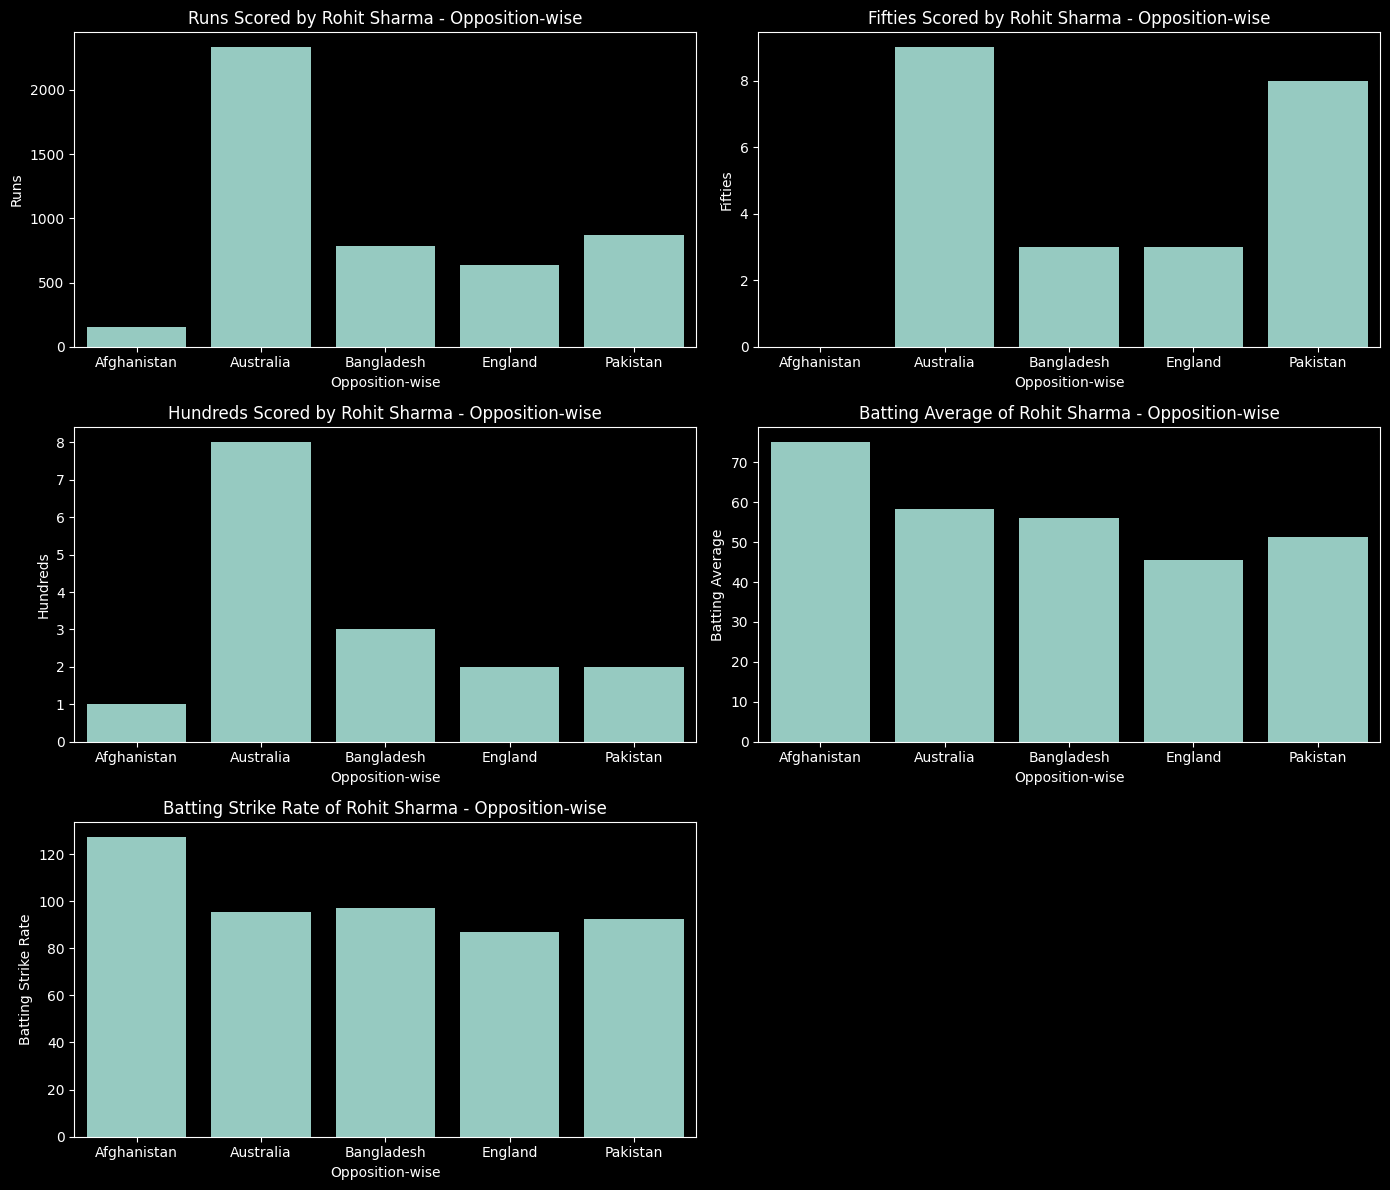

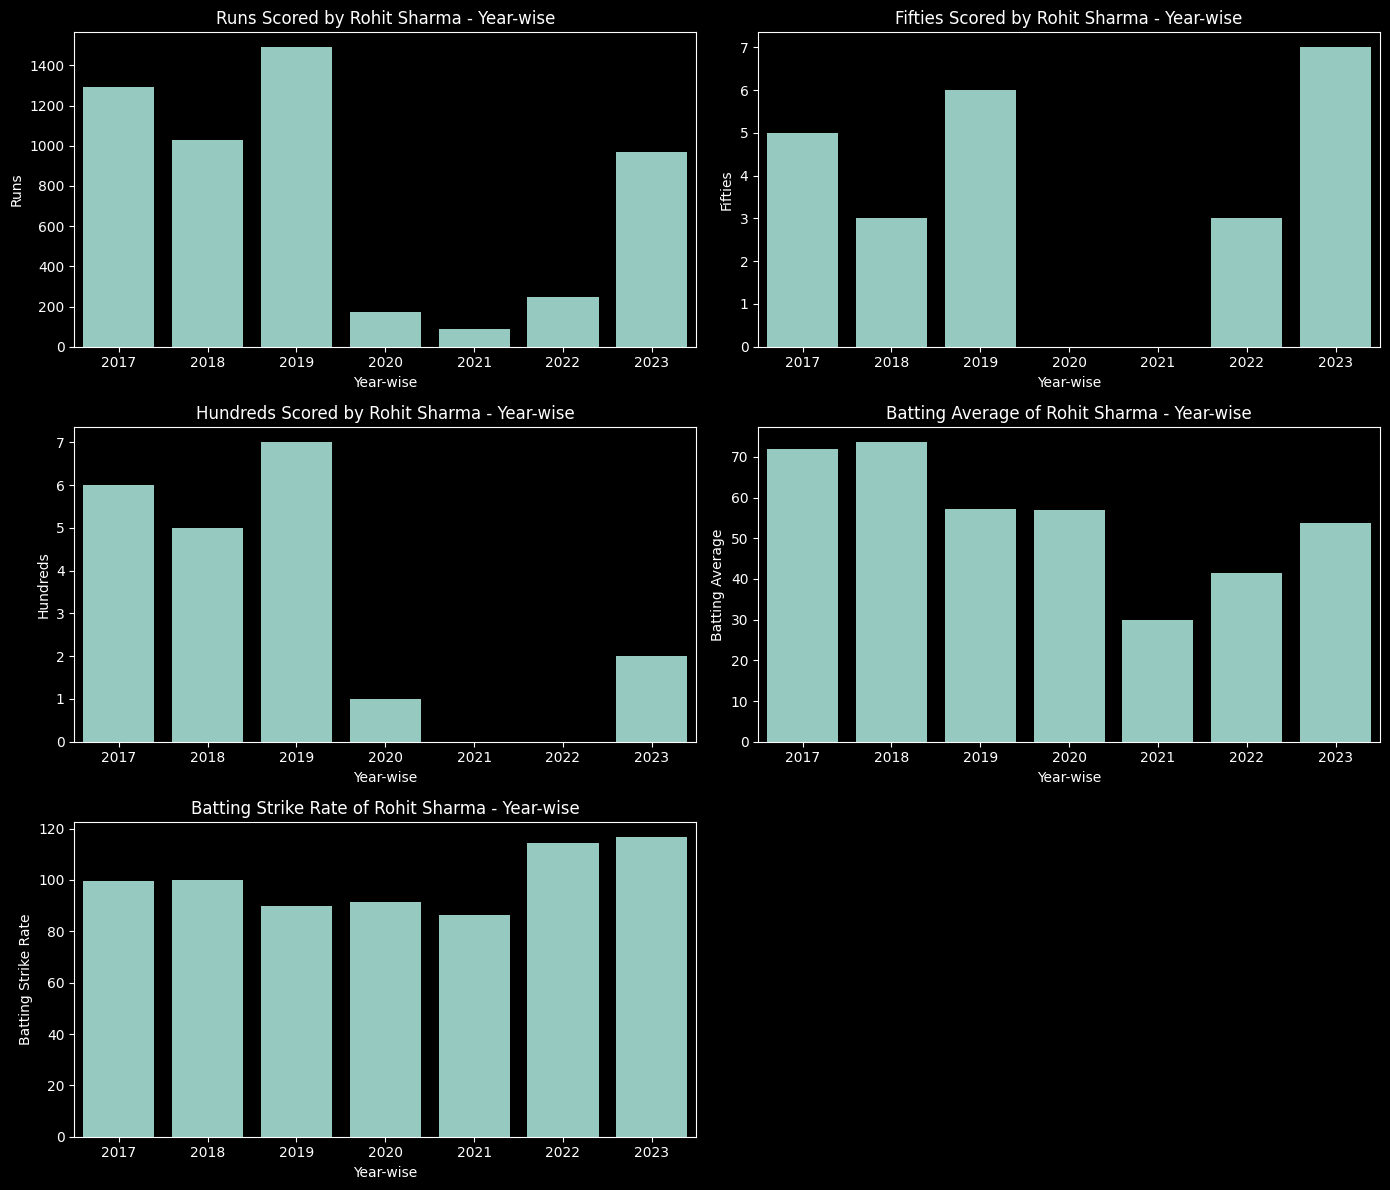

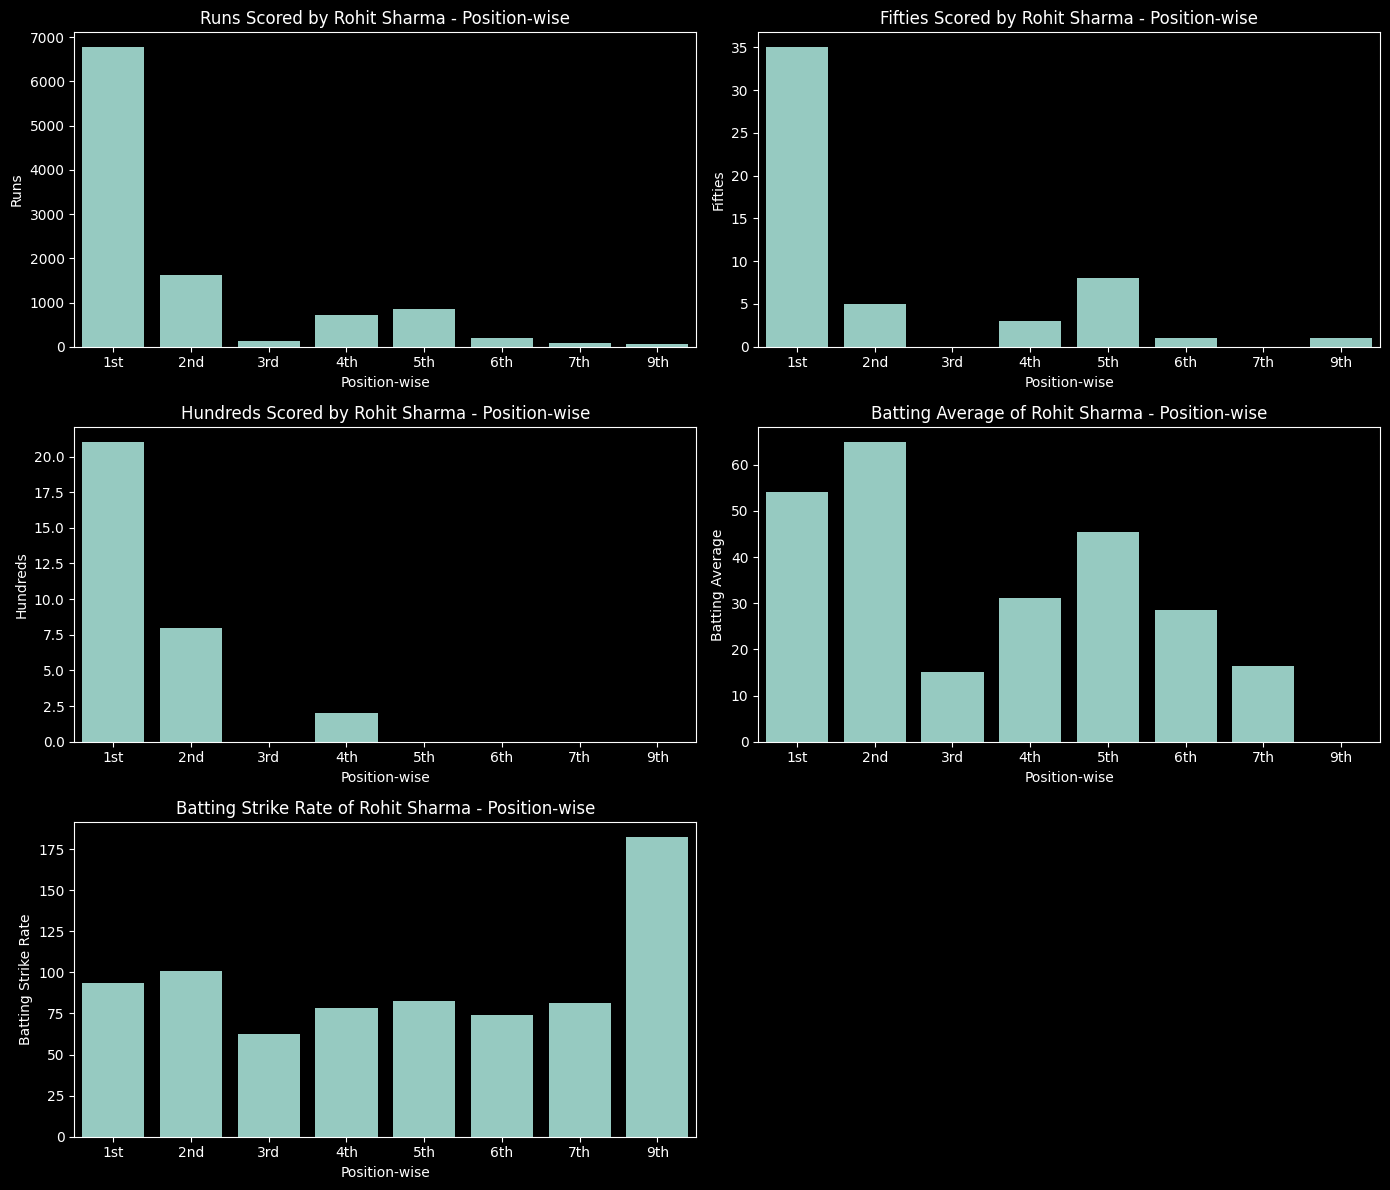

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [6]:
# Iterate through players and statistics types
for player, roles in players_and_roles.items():
    player_name = player.lower().replace(" ", "_")

    # Read player data from JSON file
    player_data = read_player_data(player_name)

    # Extract relevant batting statistics
    opposition_stats, yearwise_stats, position_stats = extract_batting_statistics(player_data)

    # Create DataFrames for easy plotting
    opposition_stats_df = pd.DataFrame(opposition_stats)
    yearwise_stats_df = pd.DataFrame(yearwise_stats)
    position_stats_df = pd.DataFrame(position_stats)

    # Iterate through statistics types and generate plots
    for stats_type, stats_df in [("Opposition-wise", opposition_stats_df),
                                 ("Year-wise", yearwise_stats_df),
                                 ("Position-wise", position_stats_df)]:
        create_batting_eda_plots(player, stats_type, stats_df)
